# <center>*fastText Data Analysis on LibraryThing Dataset (Social Recommendation Data)*</center>

**Mounting the google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Importing all the necessary libraries

import json
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
# Changing the current directory to the project files folder

!cd '/content/drive/My Drive/ADS/'

In [4]:
# The original dataset has 1.3 million rows, so here we are getting the top 0.5 million records using head and creating a copy of the original reviews file.

!head -500000 reviews.json > reviews_5L.json

head: cannot open 'reviews.json' for reading: No such file or directory


In [5]:
# Helper function that is performing various splitting operations in order to read the .json file without any issue.

def getJson(filepath):            # Defining a function with a file path parameter
    fr = open(filepath, 'r')
    lines = []                    # Creating an empty list
    for line in fr.readlines():   # Reading lines one by one from the file
        line_split = line.split(",")      # Splitting the lines where , is encountered
        set_line_split = []               # Defining the splitted line as an empty list
        for i in line_split:              # Iterating over splitted lines
            i_split = i.split(":")        # Again, splitting where : is encountered in the text
            i_set_split = []
            for split_i in i_split:
                set_split_i = ""
                rev = ""
                i = 0
                for ch in split_i:
                    if ch in ['\"','\'']:
                        set_split_i += ch
                        i += 1
                        break
                    else:
                        set_split_i += ch
                        i += 1
                i_rev = (split_i[i:])[::-1]
                state = False
                for ch in i_rev:
                    if ch in ['\"','\''] and state == False:
                        rev += ch
                        state = True
                    elif ch in ['\"','\''] and state == True:
                        rev += ch
                    else:
                        rev += ch
                i_rev = rev[::-1]
                set_split_i += i_rev
                i_set_split.append(set_split_i)
            set_line_split.append(":".join(i_set_split))
        line_modified = ",".join(set_line_split)
        lines.append(ast.literal_eval(str(line_modified)))      
    return lines
lines = getJson('/content/drive/My Drive/ADS/reviews_5L.json')

In [6]:
# Creating a pandas DataFrame of the json file output received from the above helper function and printing the top 10 records to look at the loaded data.

df_reviews = pd.DataFrame(lines)
print(df_reviews.shape)
df_reviews.head(10)

(500000, 8)


,work,flags,unixtime,stars,nhelpful,time,comment,user
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
2,12533765,[],1.352938e+09,NaN,0,"Nov 15, 2012","Magoon, K. (2012). Fire in the streets. New Yo...",edspicer
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
5,184318,[],1.231373e+09,2.0,0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist
6,364456,[],1.229645e+09,4.0,0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79
7,3067,[],1.160266e+09,4.5,0,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine
8,4857142,[],1.303430e+09,4.0,0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith
9,45518,[],1.171238e+09,2.5,0,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley


In [7]:
# Drop NAN's from all the columns of interest using subset.

Updated_df = df_reviews.dropna(subset=['comment','stars','time','user'])
print(Updated_df.shape)
Updated_df.head(10)

(406441, 8)


,work,flags,unixtime,stars,nhelpful,time,comment,user
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
5,184318,[],1.231373e+09,2.0,0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist
6,364456,[],1.229645e+09,4.0,0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79
7,3067,[],1.160266e+09,4.5,0,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine
8,4857142,[],1.303430e+09,4.0,0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith
9,45518,[],1.171238e+09,2.5,0,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley
10,20028,[],1.262736e+09,3.5,0,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple


In [8]:
# Selecting only required columns from the dataframe for further analysis.

Updated_df = Updated_df[['stars','time','comment','user']]
Updated_df.head(10)

,stars,time,comment,user
0,5.0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,5.0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
3,4.0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,3.0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
5,2.0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist
6,4.0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79
7,4.5,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine
8,4.0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith
9,2.5,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley
10,3.5,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple


In [9]:
# We are calculating the word count and the char_count, in the comment column for the reviews.

Updated_df['word_count'] = Updated_df['comment'].apply(lambda x : len(x.split()))
Updated_df['char_count'] = Updated_df['comment'].apply(lambda x : len(x.replace(" ","")))
Updated_df.head(10)

,stars,time,comment,user,word_count,char_count
0,5.0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef,16,67
1,5.0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2,484,2102
3,4.0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2,87,377
4,3.0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus,103,476
5,2.0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist,36,172
6,4.0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79,868,4655
7,4.5,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine,14,72
8,4.0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith,103,502
9,2.5,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley,129,568
10,3.5,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple,11,66


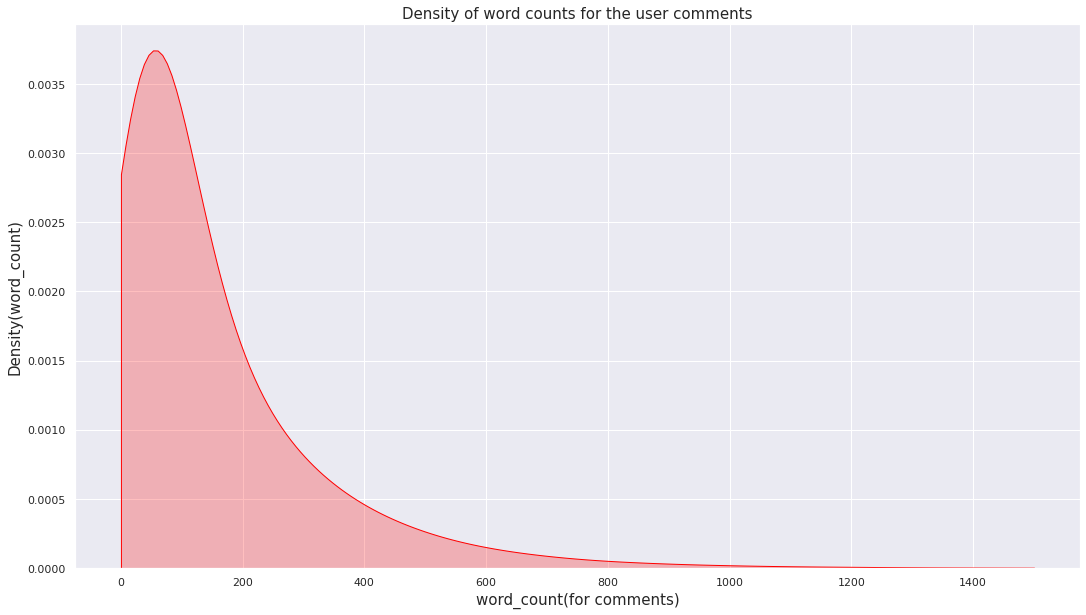

In [11]:
# Plotting a density plot to look at the distribution of the stars/ratings given to various user book's based on word

sns.set(color_codes=True)
plt.figure(figsize=(18,10))
plt.title("Density of word counts for the user comments", fontsize = 15)
plt.xlabel('word_count(for comments)', fontsize=15)
plt.ylabel('Density(word_count)', fontsize=15)
sns.kdeplot(Updated_df['word_count'], x = Updated_df['word_count'], shade=True, bw_method = 0.3, clip=(0,1500), color='red')
plt.show()

**Interpretation:** From the plot , we can interpret that, at majority, the word count for the comment/reviews from users for the author books are in the range of 0-400 words which means that majority of end users have provided comprehensive feebacks/comments to the author books.